<a href="https://colab.research.google.com/github/ming0520/LoRaHenry/blob/packetloss/EDA_on_RSSI%2CSNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ming0520/LoRaHenry/packetloss/sx1278_signal%2Bpacketloss_submit.csv')

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
  df.columns

Index(['packet_id', 'success_count', 'RSSI', 'frequency_error', 'SNR',
       'road_type', 'distance'],
      dtype='object')

In [ ]:
stat = df.groupby(['road_type', 'distance'])[['RSSI', 'frequency_error', 'SNR']].describe()

In [ ]:
stat

RSSI                                                      \
                   count        mean       std    min     25%    50%     75%   
road_type distance                                                             
curve     100       60.0  -96.516667  4.663205 -106.0 -100.25  -97.0  -93.00   
          300       59.0 -109.762712  2.291957 -116.0 -111.00 -110.0 -108.00   
          500       59.0 -109.389831  2.326882 -112.0 -111.00 -110.0 -109.00   
straight  100       60.0  -98.800000  6.893377 -113.0 -105.00  -99.5  -91.75   
          300       36.0 -110.166667  4.060260 -115.0 -114.00 -108.0 -107.00   
          500       43.0 -108.976744  3.019684 -113.0 -111.00 -110.0 -107.50   

                          frequency_error               ...                  \
                      max           count         mean  ...     75%     max   
road_type distance                                      ...                   
curve     100       -84.0            60.0   892.266667  ...   947.0   981.0   
          300      -103.0            59.0  1060.627119  ...  1073.5  1132.0   
          500       -99.0            59.0  1042.084746  ...  1048.0  1115.0   
straight  100       -82.0            60.0   773.266667  ...   780.0   830.0   
          300       -99.0            36.0   761.861111  ...   813.0   880.0   
          500      -100.0            43.0   867.116279  ...   880.0   964.0   

                     SNR                                                        
                   count      mean       std   min     25%    50%    75%   max  
road_type distance                                                              
curve     100       60.0  6.295833  4.362419 -7.25  5.5000  8.500  9.000  9.50  
          300       59.0  0.618644  3.452060 -8.25 -0.7500  1.250  2.875  5.25  
          500       59.0 -1.538136  2.012790 -7.00 -2.5000 -1.500 -0.250  3.50  
straight  100       60.0  7.786667  1.831848 -2.75  7.5000  8.250  8.750  9.50  
          300       36.0 -4.631944  2.007563 -8.50 -6.3125 -4.625 -3.375 -1.25  
          500       43.0 -2.848837  3.351057 -8.75 -4.8750 -4.000 -1.625  4.25  

[6 rows x 24 columns]

In [ ]:
var = df.groupby(['road_type', 'distance'])[['RSSI', 'frequency_error', 'SNR']].var()

In [ ]:
var

,RSSI,frequency_error,SNR
test_case_id,,,
1,2.239474,6.920789e+01,0.167105
2,4.315789,2.091447e+02,0.383388
3,4.947368,2.573250e+03,0.724342
4,7.250000,1.414123e+06,0.758388


In [ ]:
var.columns = var.columns + '_variane'

In [ ]:
df_concat = pd.concat([stat, var], axis=1)

In [ ]:
df_concat

(RSSI, count)  (RSSI, mean)  (RSSI, std)  (RSSI, min)  \
road_type distance                                                          
curve     100                60.0    -96.516667     4.663205       -106.0   
          300                59.0   -109.762712     2.291957       -116.0   
          500                59.0   -109.389831     2.326882       -112.0   
straight  100                60.0    -98.800000     6.893377       -113.0   
          300                36.0   -110.166667     4.060260       -115.0   
          500                43.0   -108.976744     3.019684       -113.0   

                    (RSSI, 25%)  (RSSI, 50%)  (RSSI, 75%)  (RSSI, max)  \
road_type distance                                                       
curve     100           -100.25        -97.0       -93.00        -84.0   
          300           -111.00       -110.0      -108.00       -103.0   
          500           -111.00       -110.0      -109.00        -99.0   
straight  100           -105.00        -99.5       -91.75        -82.0   
          300           -114.00       -108.0      -107.00        -99.0   
          500           -111.00       -110.0      -107.50       -100.0   

                    (frequency_error, count)  (frequency_error, mean)  ...  \
road_type distance                                                     ...   
curve     100                           60.0               892.266667  ...   
          300                           59.0              1060.627119  ...   
          500                           59.0              1042.084746  ...   
straight  100                           60.0               773.266667  ...   
          300                           36.0               761.861111  ...   
          500                           43.0               867.116279  ...   

                    (SNR, mean)  (SNR, std)  (SNR, min)  (SNR, 25%)  \
road_type distance                                                    
curve     100          6.295833    4.362419       -7.25      5.5000   
          300          0.618644    3.452060       -8.25     -0.7500   
          500         -1.538136    2.012790       -7.00     -2.5000   
straight  100          7.786667    1.831848       -2.75      7.5000   
          300         -4.631944    2.007563       -8.50     -6.3125   
          500         -2.848837    3.351057       -8.75     -4.8750   

                    (SNR, 50%)  (SNR, 75%)  (SNR, max)  RSSI_variane  \
road_type distance                                                     
curve     100            8.500       9.000        9.50     21.745480   
          300            1.250       2.875        5.25      5.253068   
          500           -1.500      -0.250        3.50      5.414378   
straight  100            8.250       8.750        9.50     47.518644   
          300           -4.625      -3.375       -1.25     16.485714   
          500           -4.000      -1.625        4.25      9.118494   

                    frequency_error_variane  SNR_variane  
road_type distance                                        
curve     100                   3853.148023    19.030703  
          300                    465.720631    11.916715  
          500                    491.872005     4.051322  
straight  100                    800.978531     3.355667  
          300                   3517.951587     4.030308  
          500                   1410.962348    11.229582  

[6 rows x 27 columns]

In [ ]:
df_concat.to_csv('SX1278_Signal_Analysis.csv')

In [ ]:
df[df['frequency_error'] > 5000]

,test_case_id,distance,RSSI,frequency_error,SNR,sender,receiver
65,4,1.0,-126,5393,-9.75,dragino,dragino


In [ ]:
df = df.drop(65)

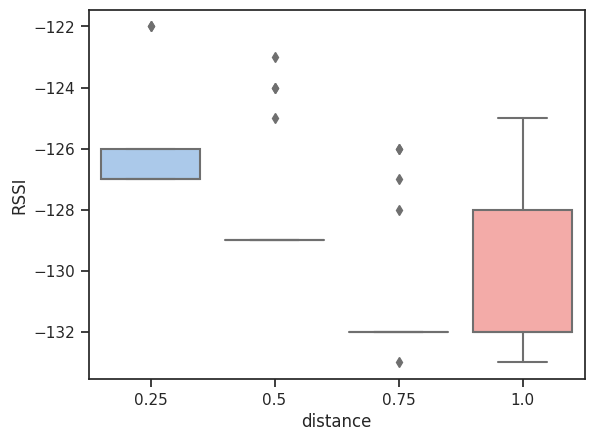

In [ ]:
import seaborn as sns
ax = sns.boxplot(x="distance", y="RSSI", data=df)


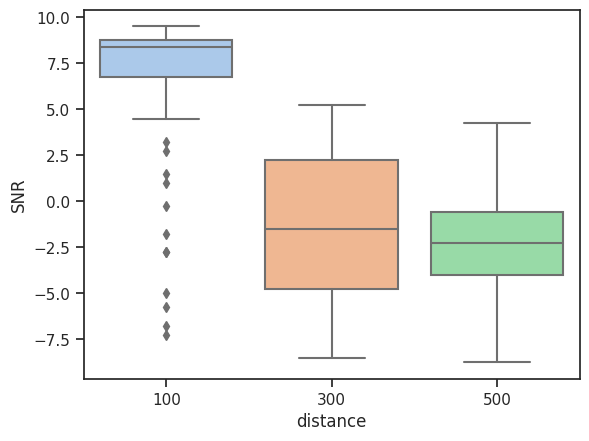

In [ ]:
import seaborn as sns
ag = sns.boxplot(x="distance", y="SNR", data=df)

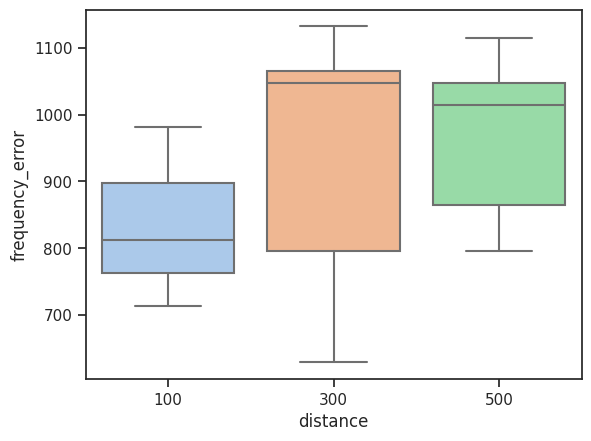

In [ ]:
import seaborn as sns
ag = sns.boxplot(x="distance", y="frequency_error", data=df)

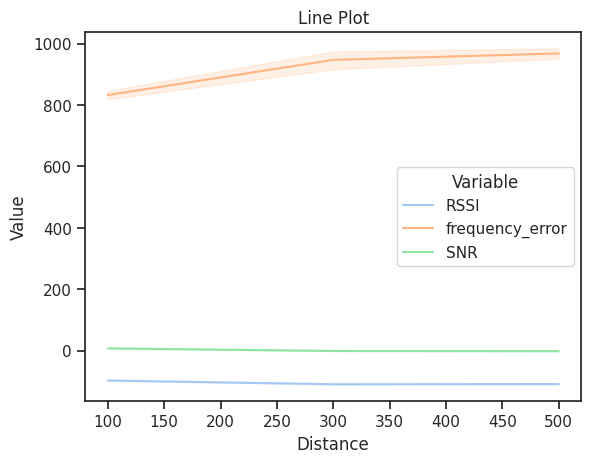

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame 'df'

# Reshape the DataFrame to a long format
df_long = pd.melt(df, id_vars=['distance'], value_vars=['RSSI', 'frequency_error', 'SNR'],
                  var_name='Variable', value_name='Value')

# Create the line plot using seaborn
sns.lineplot(data=df_long, x="distance", y='Value', hue='Variable')

# Set the title and labels
plt.title("Line Plot")
plt.xlabel("Distance")
plt.ylabel("Value")

# Show the plot
plt.show()


<Axes: xlabel='distance', ylabel='RSSI'>

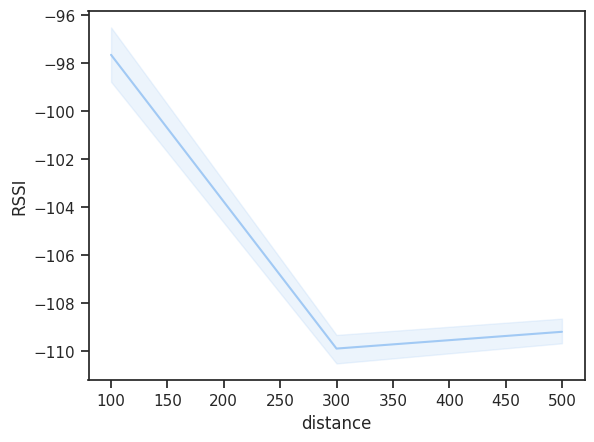

In [ ]:
sns.lineplot(data=df, x="distance", y='RSSI')

<Axes: xlabel='distance', ylabel='frequency_error'>

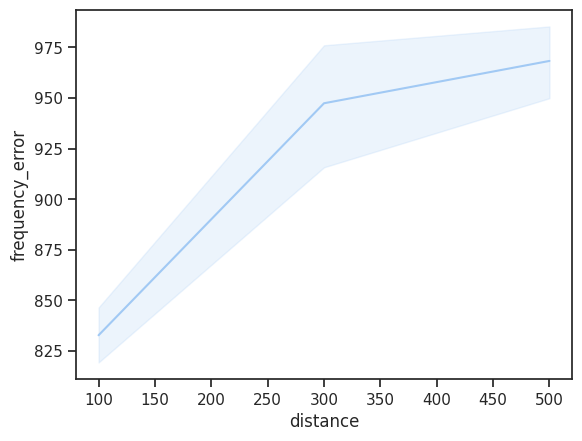

In [ ]:
sns.lineplot(data=df, x="distance", y='frequency_error')

<Axes: xlabel='distance', ylabel='SNR'>

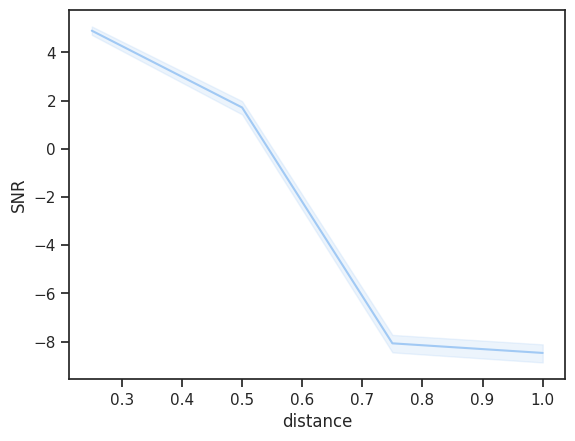

In [ ]:
sns.lineplot(data=df, x="distance", y='SNR')